In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,47.770000,48.000000,46.299999,46.801998,46.801998,53522000
1,2019-05-02,49.104000,49.425999,47.543999,48.820000,48.820000,90796500
2,2019-05-03,48.771999,51.321999,48.698002,51.006001,51.006001,118534000
3,2019-05-06,50.004002,51.669998,49.700001,51.068001,51.068001,54169500
4,2019-05-07,51.360001,51.442001,49.020000,49.411999,49.411999,50657000


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,283.305106,290.324075,275.562012,283.580043,283.580043,5.880812e+07
std,259.841058,265.548325,252.989621,259.937321,259.937321,3.632379e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.232800e+07
25%,62.619999,63.799999,61.959999,63.001999,63.001999,3.287550e+07
50%,161.000000,164.800003,157.000000,160.102005,160.102005,4.814560e+07
75%,440.760010,448.890015,428.500000,441.609985,441.609985,7.598750e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


There are abundant columns, so I will only focus on Close column.

In [5]:
df['Close'].describe()

count    505.000000
mean     283.580043
std      259.937321
min       35.793999
25%       63.001999
50%      160.102005
75%      441.609985
max      883.090027
Name: Close, dtype: float64

I will explain something about the information above. I have 505 observations in this dataset in two years that make sense because the market closes on Saturday and Sunday.
The min was only 35 compare to the max was 883, which means Tesla is overgrowing. The Standard Deviation was huge, which means it volatility asset (a very risky asset).
The median was 160 compare to the max.  The skewness is coming from the fact that in the last year, we see that Tesla's price has moved from 160 to 883. This dataset is hugely skewed.

The important thing in finance or investment is the Return. The Return is the percentage change, and I will calculate the Return using "Adj Close" columns.

In [6]:
df['Return']=df['Adj Close'].pct_change()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2019-05-01,47.770000,48.000000,46.299999,46.801998,46.801998,53522000,NaN
1,2019-05-02,49.104000,49.425999,47.543999,48.820000,48.820000,90796500,0.043118
2,2019-05-03,48.771999,51.321999,48.698002,51.006001,51.006001,118534000,0.044777
3,2019-05-06,50.004002,51.669998,49.700001,51.068001,51.068001,54169500,0.001216
4,2019-05-07,51.360001,51.442001,49.020000,49.411999,49.411999,50657000,-0.032427


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

In [9]:
df.set_index('Date', inplace=True)

Let's do some visualization to make the data more transparent.

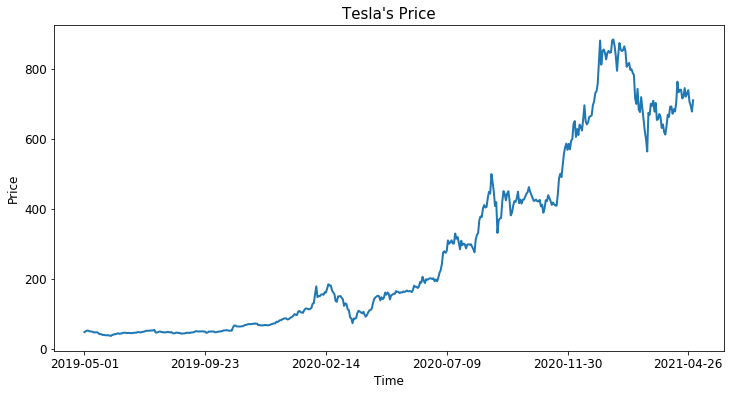

In [10]:
df['Close'].plot(figsize=(12,6), linewidth=2, fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title("Tesla's Price", fontsize=15)
plt.show()

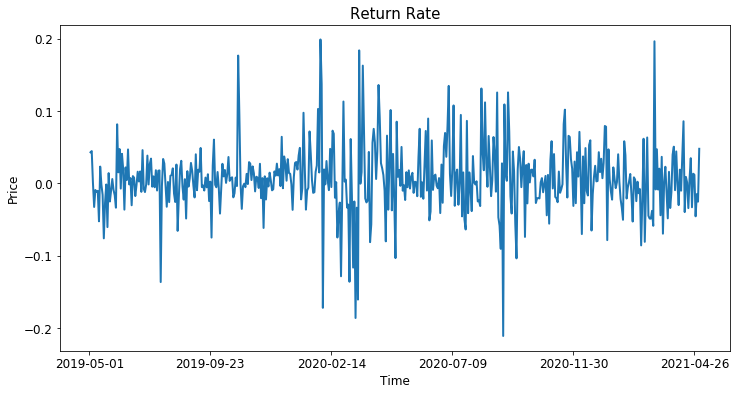

In [11]:
df['Return'].plot(style=['-'],figsize=(12,6), linewidth=2, fontsize=12 )
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.title('Return Rate', fontsize=15)
plt.show()

Next step, I will only keep 'Date' and 'Close' columns to put in the ARIMA model.

In [17]:
price=pd.DataFrame(df['Close'])

In [18]:
price.head()

,Close
Date,
2019-05-01,46.801998
2019-05-02,48.820000
2019-05-03,51.006001
2019-05-06,51.068001
2019-05-07,49.411999
